In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
plt.style.use('ggplot')

In [ ]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [3]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [4]:
scaleFeatures = True

In [5]:
df=pd.read_csv('../DAT210x/Module4/Datasets/kidney_disease.csv', index_col='id')

In [6]:
dfclean=df.dropna(axis=0)

In [9]:
dfclean.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [10]:
cols=['wc', 'rc']
dfclean_num=dfclean.copy()

dfclean_num[cols]=dfclean_num[cols].apply(pd.to_numeric, errors='raise')
dfclean_num.dtypes
df=dfclean_num.copy()

In [11]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [12]:
df_short=df[['bgr', 'wc', 'rc']]

In [13]:
df_short.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


In [14]:
df_short.var()

bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64

In [15]:
df=df_short.copy()

In [16]:
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                 bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -4.497106e-17 -4.497106e-17  1.349132e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00


In [20]:
df.var()

bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2, svd_solver='full')
pca.fit(df)
T=pca.transform(df)

Features by importance:
 [(3.999807155688487, 'wc'), (3.258887664121093, 'bgr'), (3.0097527529983648, 'rc')]


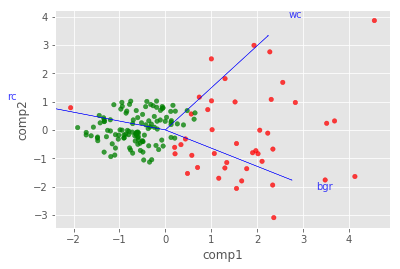

In [19]:
ax=drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T=pd.DataFrame(T)
T.columns=['comp1', 'comp2']
T.plot.scatter(x='comp1', y='comp2', marker='o', c=labels, alpha=.75, ax=ax)

In [ ]:
T.describe()